In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [10]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

print(f"Initial training data shape: {x_train.shape}")
print(f"Initial training labels shape: {y_train.shape}")

Initial training data shape: (60000, 28, 28)
Initial training labels shape: (60000,)


In [11]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
print("\n----- Training the Model -----")

trained_model = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

print("\n ---- Evaluating the Model ---")
loss, acc = model.evaluate(x_test, y_test)

print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')






----- Training the Model -----
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - accuracy: 0.8727 - loss: 0.4009 - val_accuracy: 0.9804 - val_loss: 0.0590
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 57ms/step - accuracy: 0.9827 - loss: 0.0562 - val_accuracy: 0.9860 - val_loss: 0.0388
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9871 - val_loss: 0.0375
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9887 - val_loss: 0.0341
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 50ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9908 - val_loss: 0.0300

 ---- Evaluating the Model ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9876 - loss: 0.0389
Test loss: 0.030018923804163933
Test accuracy: 0.9908000230789185


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


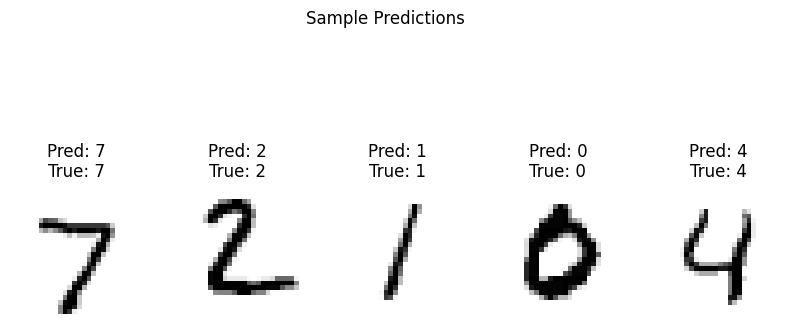

In [17]:
preds = model.predict(x_test[:5])

plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1,5, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray_r')

  predicted_label = np.argmax(preds[i])
  true_label = np.argmax(y_test[i])

  plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
  plt.axis('off')

plt.suptitle("Sample Predictions")

plt.show()